In [9]:
# !pip install bs4
# !pip install requests
# !pip install pandas
# !pip install wordcloud
# !pip install seaborn

# import sys
# from os import path


import numpy as np
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
from wordcloud import WordCloud, STOPWORDS
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
import scipy.stats as ss

# Hillary Clinton's Emails

In [3]:
url = "https://wikileaks.org/clinton-emails/?q=%28favor+%26+confidential%29+%7C+%28favor+%26+classified%29&mfrom=&mto=&title=&notitle=&date_from=&date_to=&nofrom=&noto=&count=200&sort=0&page=1&#searchresult"
r = requests.get(url)
soup = bs(r.content, 'html.parser')

### Locate and Create Table of Target Emails

In [4]:
table = soup.find("table",  class_='table table-striped search-result')
tab_rows = table.find_all('tr')

In [5]:
l = []
for tr in tab_rows:
    td = tr.find_all('td')
    row = tr.get_text().strip() 
    l.append(row)

### Turn Table into Data Frame

In [6]:
df = pd.DataFrame(l)
df[['DocID', 'Date', 'Subject', 'From', 'To']] = df[0].str.split('\n', expand=True)
df = df.iloc[1:,1:]

### Create Giant Text List

In [7]:
url1 = 'https://wikileaks.org/clinton-emails/emailid/'

li = []
for i in df.iloc[1:40,0]:
    one = url1 + i
    one1 = requests.get(one)
    two = bs(one1.content, 'html.parser')
    three = two.find(id='uniquer')
    four = three.get_text().strip()
    li.append(four)

### Create Word Usage Data Frame

In [10]:
wordlist = list(re.sub('[' + string.punctuation + ']', '', four).lower().split())   
freq = [wordlist.count(w) for w in wordlist]
five = dict(list(zip(wordlist, freq)))
usage = pd.DataFrame(list(five.items()),columns=['Word', 'Count'])
usage.sort_values(by='Count', ascending=False, inplace=True)

# George Orwell's 1984

In [11]:
url2 = 'http://www.george-orwell.org/1984/'

### Create Giant Text List

In [12]:
story = []
for i in range(22,23):
    myurl = url2 + str(i) + '.html'
    s = requests.get(myurl)
    ch = bs(s.content, 'html.parser')
    six = [sib.get_text() for sib in ch.find('h2').next_siblings]
    story.append(six)


In [13]:
eight = [str(i).split() for i in story]
nine = []
for phrase in eight:
    for word in phrase:
        nine.append(word)


### Create Word Usage Data Frame

In [14]:
words2 = [ str(w).lower().strip() for w in nine ]
table = str.maketrans(dict.fromkeys(string.punctuation))
words1 = [i.translate(table) for i in nine]

In [15]:
freq1 = [words1.count(w) for w in words1]
sev = dict(list(zip(words1, freq1)))

In [16]:
usage1 = pd.DataFrame(list(sev.items()),columns=['Word', 'Count'])
usage1.sort_values(by='Count', ascending=False, inplace=True)


## STOPWORDS and Other Filters

In [17]:
stopwords = []
stopwords = list(set(STOPWORDS))
stopwords += ['>','from:','to:', 'no.', 'date:','sent:','subject:', 're:',
             'original', 'message', 'cameron', 'robinson', 'shaun',
             'c05774510', '11302015', 'f201420439', "o\\'brien", "Winston", 'There']

In [18]:
filt = (usage.Word.isin(stopwords))
filt1 = (usage1.Word.isin(stopwords))
unique = usage[~filt]
unique1 = usage1[~filt1]
length = [len(w) for w in unique.Word]
length1 = [len(w) for w in unique1.Word]
unique.insert(2, 'Length', length, True)
unique1.insert(2, 'Length', length1, True)
filt2 = (unique['Length'] > 4)
filt3 = (unique1['Length'] > 4)
#---------------------------------------------------
usage2 = usage.sort_values(by='Count', ascending=True)
usage3 = usage1.sort_values(by='Count', ascending=True)
filt6 = (usage2.Word.isin(stopwords))
filt7 = (usage3.Word.isin(stopwords))
unique2 = usage2[~filt6]
unique3 = usage3[~filt7]

length2 = [len(w) for w in unique2.Word]
length3 = [len(w) for w in unique3.Word]
unique2.insert(2, 'Length', length, True)
unique3.insert(2, 'Length', length1, True)
filt4 = (unique2['Length'] > 4)
filt5 = (unique3['Length'] > 4)

### Final Data Frames and Lists

In [19]:
a=unique[filt2].iloc[1:11,0:2]
b=unique1[filt3].iloc[1:11,0:2]
#--------------
c=unique2[filt4].iloc[1:11,0:2]
d=unique3[filt5].iloc[1:11,0:2]

hrc_lst = unique[filt2]
_1984_lst = unique1[filt3]

In [20]:
e = unique[filt2]

e['Type'] = np.repeat('HRC', len(e['Word']))
ff = unique1[filt3]
ff['Type'] = np.repeat('1984', len(ff['Word']))
fff = sample(list(np.arange(0,len(ff['Word']), step=1)), len(e['Word']))

f = ff.iloc[fff]

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Length Checks

In [21]:
mydict = {
    'HRC'  : [len(hrc_lst['Word'])],
    '1984' : [len(_1984_lst['Word'])]}

df2 = pd.DataFrame(mydict, index=['words'])
df2

,HRC,1984
words,199,837


In [22]:
hrc = e['Word'].to_string()
_1984 = f['Word'].to_string()

mydict1 = {
    'HRC'  : [len(e['Word'])],
    '1984' : [len(f['Word'])]}

df3 = pd.DataFrame(mydict1, index=['words'])
df3

,HRC,1984
words,199,199


## Most Used Words

Text(0.5, 1.0, '1984')

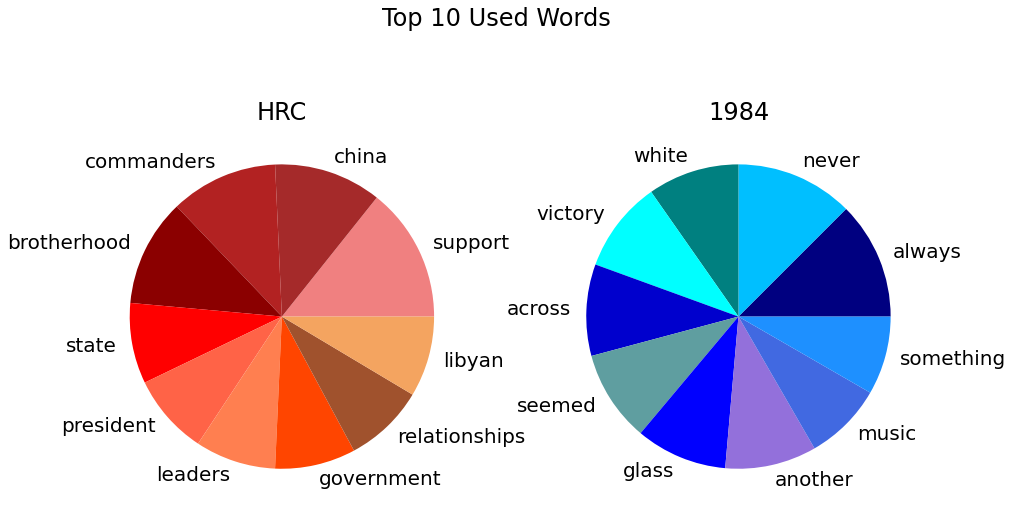

In [23]:
colors = ['lightcoral', 'brown', 'firebrick', 'darkred', 'red', 'tomato', 'coral', 'orangered','sienna','sandybrown']
colors1 = ['navy', 'deepskyblue', 'teal','aqua', 'mediumblue', 'cadetblue', 'blue', 'mediumpurple', 'royalblue', 'dodgerblue']

fig, axs = plt.subplots(1,2, figsize=(15,9))
plt.rcParams.update({'font.size' : 20})
fig.suptitle('Top 10 Used Words')
axs[0].pie(a['Count'], labels=a['Word'], colors=colors)
axs[1].pie(b['Count'], labels=b['Word'], colors=colors1)
axs[0].set_title("HRC")
axs[1].set_title("1984")

 

In [24]:
a['Type'] = np.repeat('HRC', len(a['Word']))
b['Type'] = np.repeat('1984', len(b['Word']))

a = a.set_index([np.arange(0,10,step=1)])
b = b.set_index([np.arange(0,10,step=1)])

ab = pd.concat([y.reset_index(drop=True) for y in [a, b]], axis=1)
ab

,Word,Count,Type,Word,Count,Type
0,support,5,HRC,always,9,1984
1,china,4,HRC,never,9,1984
2,commanders,4,HRC,white,7,1984
3,brotherhood,4,HRC,victory,7,1984
4,state,3,HRC,across,7,1984
5,president,3,HRC,seemed,7,1984
6,leaders,3,HRC,glass,7,1984
7,government,3,HRC,another,7,1984
8,relationships,3,HRC,music,6,1984
9,libyan,3,HRC,something,6,1984


Text(0.5, 1.0, '1984')

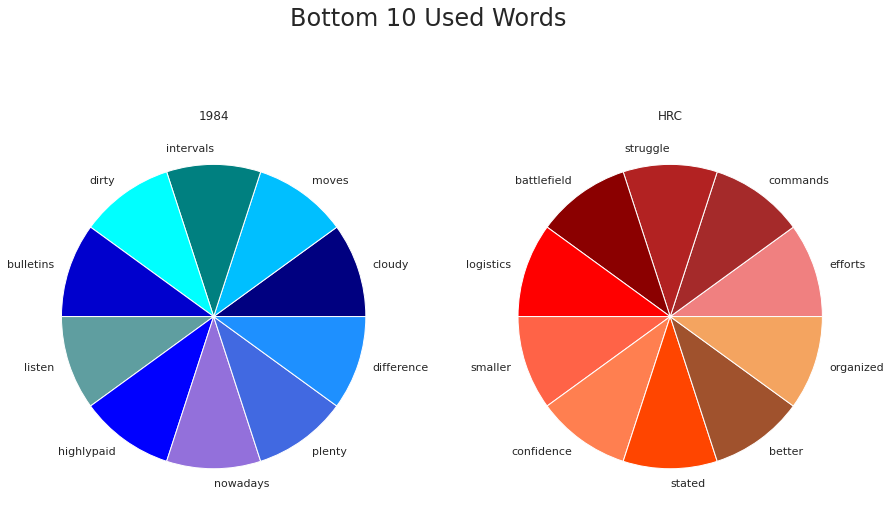

In [32]:
fig5, axs5 = plt.subplots(1,2, figsize=(15,9))
plt.rcParams.update({'font.size' : 20})
fig5.suptitle('Bottom 10 Used Words')
axs5[1].pie(c['Count'], labels=c['Word'], colors=colors)
axs5[0].pie(d['Count'], labels=d['Word'], colors=colors1)
axs5[1].set_title("HRC")
axs5[0].set_title("1984")

In [40]:
c['Type'] = np.repeat('HRC', len(a['Word']))
d['Type'] = np.repeat('1984', len(b['Word']))

c = c.set_index([np.arange(0,10,step=1)])
d = d.set_index([np.arange(0,10,step=1)])

cd = pd.concat([y.reset_index(drop=True) for y in [c, d]], axis=1)
cd

,Word,Count,Type,Word,Count,Type
0,efforts,1,HRC,cloudy,1,1984
1,commands,1,HRC,moves,1,1984
2,struggle,1,HRC,intervals,1,1984
3,battlefield,1,HRC,dirty,1,1984
4,logistics,1,HRC,bulletins,1,1984
5,smaller,1,HRC,listen,1,1984
6,confidence,1,HRC,highlypaid,1,1984
7,stated,1,HRC,nowadays,1,1984
8,better,1,HRC,plenty,1,1984
9,organized,1,HRC,difference,1,1984


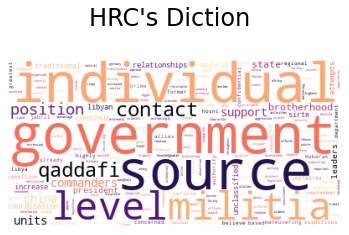

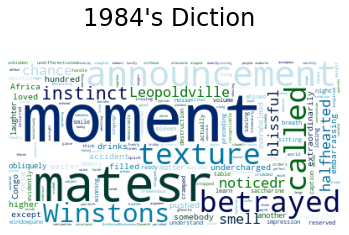

In [26]:
wordcloud = WordCloud(max_font_size = 80, background_color = 'white',
                     collocations = True, colormap='magma').generate(hrc)
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.suptitle("HRC's Diction")

wordcloud1 = WordCloud(max_font_size = 80, background_color = "white", 
                      collocations = True, colormap = "ocean").generate(_1984)
plt.figure()
plt.imshow(wordcloud1)
plt.axis("off")
plt.suptitle("1984's Diction")
plt.show()

### Distribution of Word Use

Text(0.5, 0.98, 'How Often Was Each Word Used?')

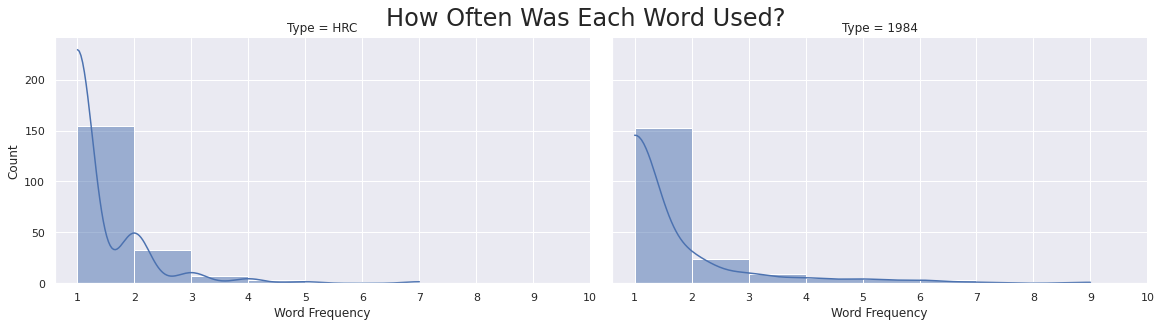

In [39]:
g = e.append(f, ignore_index=True)
fac = sns.FacetGrid(g, col='Type', height=4.5, aspect=1.8)
fac.map_dataframe(sns.histplot, x='Count', kde=True, binwidth=1)
fac.set_axis_labels('Word Frequency', 'Count')
fac.set(xticks=[x for x in np.arange(start=1, stop=11, step=1)])
fac.fig.suptitle('How Often Was Each Word Used?')

### Outliers

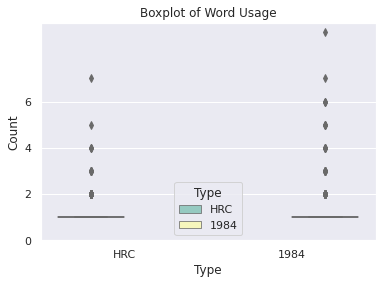

In [28]:
sns.set_theme(style='darkgrid')
box = sns.boxplot(x='Type', y='Count', data=g, hue='Type', 
                  palette='Set3').set_title('Boxplot of Word Usage')
plt.yticks(np.arange(start=0, stop=8, step=2))
plt.show()

## Summary Statistics

In [29]:
var = 'Count'
type_grp = g.groupby('Type')

xbar_hrc = type_grp.mean()[var].iloc[1]
xbar_1984 = type_grp.mean()[var].iloc[0]
s_hrc = type_grp.std()[var].iloc[1]
s_1984 = type_grp.std()[var].iloc[0]
n_hrc = type_grp.count()[var].iloc[1]
n_1984 = type_grp.count()[var].iloc[0]
var_hrc = type_grp.var()[var].iloc[1]
var_1984 = type_grp.var()[var].iloc[0]

mydict2 = {
    'HRC'  : [xbar_hrc, s_hrc, n_hrc, var_hrc],
    '1984' : [xbar_1984, s_1984, n_1984, var_1984]
}

df4 = pd.DataFrame(mydict2, index=['mean', 'std', 'n', 'var']) 
df5 = df4.round(decimals=3)
df5

,HRC,1984
mean,1.332,1.513
std,0.772,1.214
n,199.000,199.000
var,0.597,1.473


### t-Test to check for difference in mean word usage

In [30]:
tobs = (xbar_hrc - xbar_1984) / ( s_hrc**2/n_hrc + s_1984**2/n_1984 )**(1/2)
deg_free = (s_hrc**2/n_hrc + s_1984**2/n_1984)**2 / ( (s_hrc**2/n_hrc)**2/(n_hrc-1) + (s_1984**2/n_1984)**2/(n_1984-1) ) 
t_dist = ss.t(deg_free)
pval = t_dist.cdf(tobs)

mydict3 = {
    't' : tobs,
    'df' : deg_free,
    'pval' : pval
}

df6 = pd.DataFrame(mydict3, index=['Count'])
df6


,t,df,pval
Count,-1.77381,335.750828,0.0385


In [31]:
# df6.append(df7).set_index([pd.Index(['Count', 'Length'])])